## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from xgboost import XGBRegressor



## Getting the data 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


## Data Analysis 


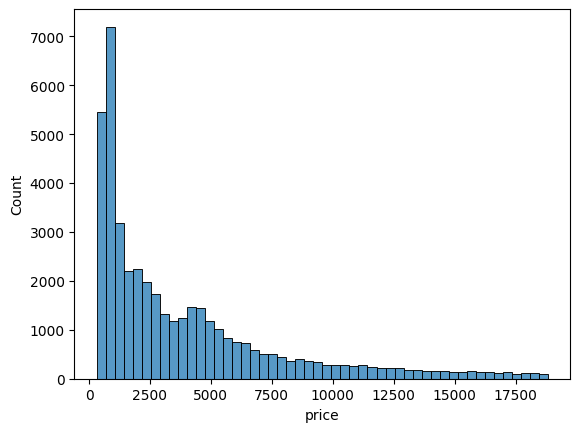

In [5]:
# Explore the distribution of the target variable (price)
sns.histplot(train["price"], bins=50)
plt.show()


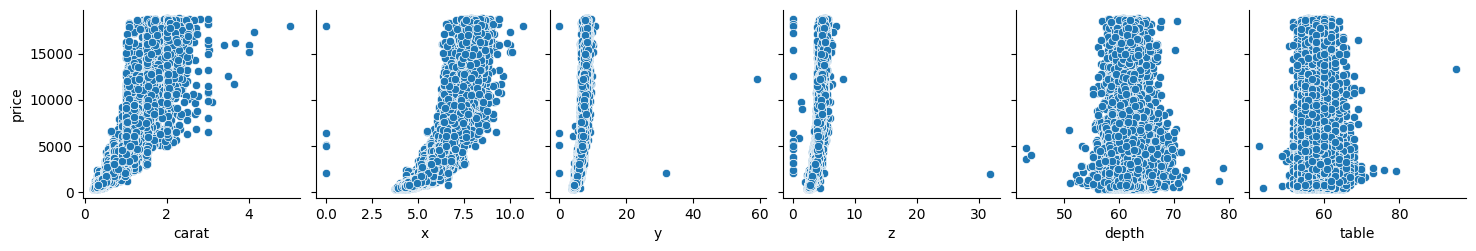

In [6]:
# Explore the relationship between price and other numerical features (carat, x, y, z, depth, table)
sns.pairplot(train, x_vars=["carat", "x", "y", "z", "depth", "table"], y_vars=["price"])
plt.show()

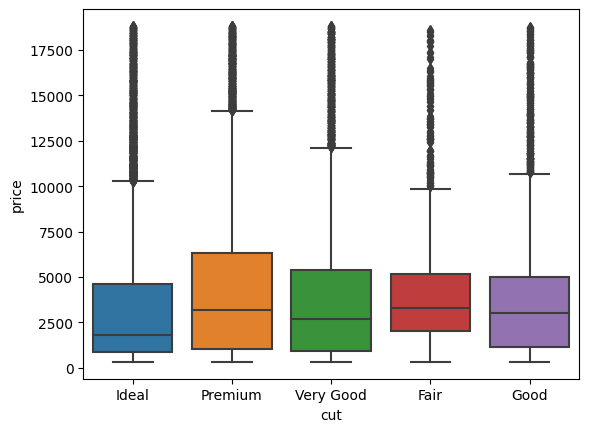

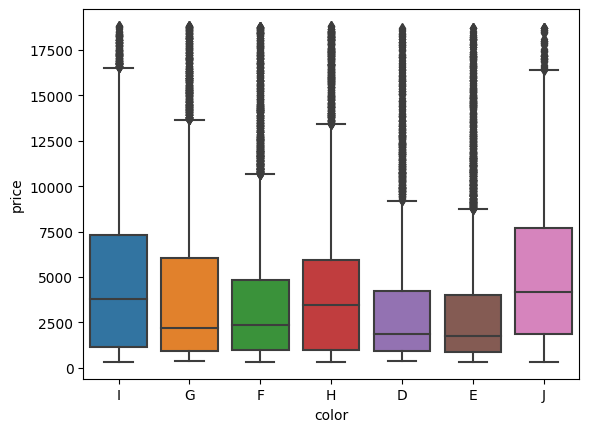

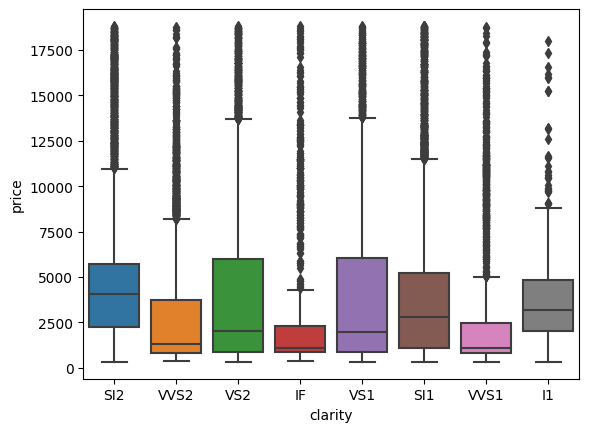

In [7]:
sns.boxplot(x="cut", y="price", data=train)
plt.show()
sns.boxplot(x="color", y="price", data=train)
plt.show()
sns.boxplot(x="clarity", y="price", data=train)
plt.show()

C:\Users\Yassin52\AppData\Local\Temp\ipykernel_2096\2769906748.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='coolwarm', annot=True)


<Axes: >

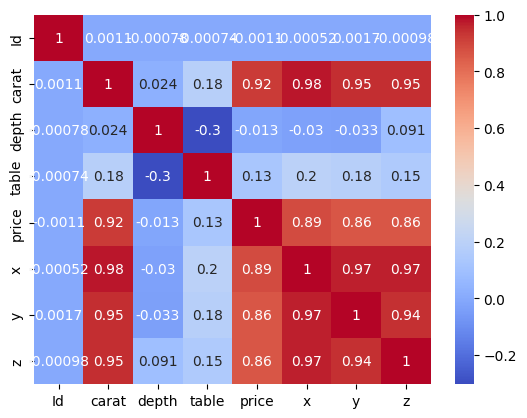

In [8]:
sns.heatmap(train.corr(), cmap='coolwarm', annot=True)


## Prepare the Data

In [9]:
# Check for missing values
train.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [10]:
# Check for outliers
train.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
train.head()


,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [12]:
train['volume']=train['x'] * train['y'] * train['z']
train=train.drop(['x','y','z'], axis=1)

In [13]:
test['volume']= test['x'] * test['y'] * test['z']
test=test.drop(['x','y','z'], axis=1)

In [14]:
a = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
b = {'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
c = {'I1':0 , 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7 }

In [15]:
train['cut']=train['cut'].map(a)
test['cut']= test['cut'].map(a)

In [16]:
train['color']=train['color'].map(b)
test['color'] = test['color'].map(b)

In [17]:
train['clarity']=train['clarity'].map(c)
test['clarity']=test['clarity'].map(c)

In [18]:
train.head()


,Id,carat,cut,color,clarity,depth,table,price,volume
0,1,1.06,4,1,1,61.8,57.0,4270,176.483340
1,2,1.51,3,3,5,60.9,58.0,15164,246.965796
2,3,0.32,4,4,3,61.3,56.0,828,52.943373
3,4,0.53,4,3,3,61.2,56.0,1577,86.422842
4,5,0.70,3,2,5,61.0,57.0,2596,115.315200


In [19]:
corr_matrix = train.corr()
corr_matrix['price'].sort_values(ascending= False)

price      1.000000
carat      0.921911
volume     0.897903
table      0.128501
Id        -0.001111
depth     -0.013137
cut       -0.056404
clarity   -0.147572
color     -0.171862
Name: price, dtype: float64

In [20]:
X = train.drop(['price'], axis=1)
y= train['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X ,y,test_size=0.2, random_state=42)


In [22]:
train_df_Ran=RandomForestRegressor()
train_df_Ran.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
y_pred_ra=train_df_Ran.predict(X_test)


In [24]:
forest_mse=mean_squared_error(y_test,y_pred_ra)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

536.8865358160757

In [25]:
from lightgbm.sklearn import LGBMRegressor
import lightgbm as lgb

In [26]:
model = lgb.LGBMRegressor()

In [27]:
model.fit(X_train,y_train)


LGBMRegressor()

In [28]:
pred = model.predict(X_test)

In [29]:
LG_mse = mean_squared_error(y_test,pred)
LG_rmse = np.sqrt(LG_mse)
LG_rmse

520.3349697620662

In [30]:
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

In [31]:
param = {'objective':'reg:squarederror', 'booster':'gbtree', 'learning_rate' : 0.5,
         'reg_alpha': 10, 'reg_lambda': 10, 'random_state' : 1,
         'n_jobs' : -1}
xgb = XGBRegressor(**param)

In [32]:
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [33]:
xgb_pred = xgb.predict(X_test)


In [34]:
xgb_mse = mean_squared_error(y_test,xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

556.0918105381926

In [35]:
param_grid = { 
    'model__n_estimators': [10,20, 30],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [4,5,6,7,8]}
grid_search = GridSearchCV(model,param_grid,cv = 10, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__max_features
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__max_features
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__max_features
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__max_features
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__max_features
[LightGBM] [Warning] Unknown parameter: model__n_estimators
[LightGBM] [Warning] Unknown parameter: model__max_depth
[LightGBM] [Warning] Unknown parameter: model__max_feature

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'model__max_depth': [4, 5, 6, 7, 8],
                         'model__max_features': ['auto', 'sqrt', 'log2'],
                         'model__n_estimators': [10, 20, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
Id=test['Id']


In [39]:
pred =model.predict(test)
data={'Id': Id, 'price':pred }
sub = pd.DataFrame(data=data)

In [40]:
sub.to_csv('sub6.csv',index=False)